# Circulation Statistics of The Career Center Resource Library

This code reads in circulation data beginning in 2012 until April 2017 from Koha, The Career Center Library's online catalog database. With this data, the code below renders visual representations - i.e. graphs - of the following:

- number of circulation transactions over this time period by date
- number of circulation transactions over this time period grouped by month
- number of circulation transactions over this time period grouped by year
- volume of transactions of overall for a given month
- top 20 most popular subjects

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import pandas as pd
from datetime import datetime
from collections import defaultdict
koha_initial_file = "koha_initial_data.csv"
koha_dataframe = pd.read_csv(koha_initial_file, sep=";", parse_dates = ["datetime"])

## Preliminary Data Import and Dataframe Creation

Reading in a csv file derived from Koha database. File contains information about transaction type - checkout, renewal, or recorded local use - and book information associated with the transaction type - date, call number, title, and subjects (derived from marcxml).

After reading in csv file, display as a dataframe.

In [2]:
koha_dataframe

,type,datetime,itemcallnumber,title,subjects
0,issue,2012-05-29 13:59:06,HV8143.S86,Opportunities in law enforcement and criminal ...,Police Vocational guidance United States. Law ...
1,issue,2012-06-01 08:16:26,RA441.O83 2005,Finding work in global health :,World health Vocational guidance. Vocational g...
2,issue,2012-06-04 10:50:38,HF5382.75.U6.B755 2010,You majored in what? :,College graduates Employment United States. Co...
3,issue,2012-07-11 09:32:01,HD6051.1.HF5381 2003,Career guide and directory for immigrant profe...,"Vocational guidance United States Handbooks, m..."
4,issue,2012-07-11 09:59:09,HF5381.PN147 2005,Six-figure freelancing :,"Authorship Handbooks, manuals, etc. Freelance ..."
5,issue,2012-07-11 10:06:15,HF5381.PN147 2005,Six-figure freelancing :,"Authorship Handbooks, manuals, etc. Freelance ..."
6,issue,2012-07-11 10:08:36,HF5381.PN147 2005,Six-figure freelancing :,"Authorship Handbooks, manuals, etc. Freelance ..."
7,issue,2012-07-13 14:48:09,HF5381.PN147 2005,Six-figure freelancing :,"Authorship Handbooks, manuals, etc. Freelance ..."
8,localuse,2012-07-13 14:52:42,HF5381.PN147 2005,Six-figure freelancing :,"Authorship Handbooks, manuals, etc. Freelance ..."
9,localuse,2012-07-13 14:57:00,HF5381.LB2300 2007,Transitions : a guide for the transfer student /,College students United States. College studen...


Because I want to be able to plot circulation statistics over time, I wanted to first get rid of the timestamp so I could see circulation by date. I also wanted to see statistics monthly, yearly trends, and overall if there are any popular months. I then added these new columns to the dataframe.

In [3]:
koha_dataframe["date"] = koha_dataframe.datetime.dt.date

koha_dataframe["year"] = koha_dataframe.datetime.dt.year

koha_dataframe["month"] = koha_dataframe.datetime.dt.strftime('%m')

koha_dataframe['month_year'] = koha_dataframe.datetime.dt.strftime('%Y-%m')

Used the code below to delete the datetime column.

In [4]:
koha_dataframe.drop('datetime', axis=1, inplace=True)

This is the data that I will be using to calculate all but subject popularity.

In [5]:
koha_dataframe

,type,itemcallnumber,title,subjects,date,year,month,month_year
0,issue,HV8143.S86,Opportunities in law enforcement and criminal ...,Police Vocational guidance United States. Law ...,2012-05-29,2012,05,2012-05
1,issue,RA441.O83 2005,Finding work in global health :,World health Vocational guidance. Vocational g...,2012-06-01,2012,06,2012-06
2,issue,HF5382.75.U6.B755 2010,You majored in what? :,College graduates Employment United States. Co...,2012-06-04,2012,06,2012-06
3,issue,HD6051.1.HF5381 2003,Career guide and directory for immigrant profe...,"Vocational guidance United States Handbooks, m...",2012-07-11,2012,07,2012-07
4,issue,HF5381.PN147 2005,Six-figure freelancing :,"Authorship Handbooks, manuals, etc. Freelance ...",2012-07-11,2012,07,2012-07
5,issue,HF5381.PN147 2005,Six-figure freelancing :,"Authorship Handbooks, manuals, etc. Freelance ...",2012-07-11,2012,07,2012-07
6,issue,HF5381.PN147 2005,Six-figure freelancing :,"Authorship Handbooks, manuals, etc. Freelance ...",2012-07-11,2012,07,2012-07
7,issue,HF5381.PN147 2005,Six-figure freelancing :,"Authorship Handbooks, manuals, etc. Freelance ...",2012-07-13,2012,07,2012-07
8,localuse,HF5381.PN147 2005,Six-figure freelancing :,"Authorship Handbooks, manuals, etc. Freelance ...",2012-07-13,2012,07,2012-07
9,localuse,HF5381.LB2300 2007,Transitions : a guide for the transfer student /,College students United States. College studen...,2012-07-13,2012,07,2012-07


## Data Visualization of The Career Center Library Statistics

### Transactions Over Time by Date

For each type of visualization, I started by creating a dictionary of the time as the key and the count of the time as the values. Then I converted the dictionary to a Pandas series and plotted those values.

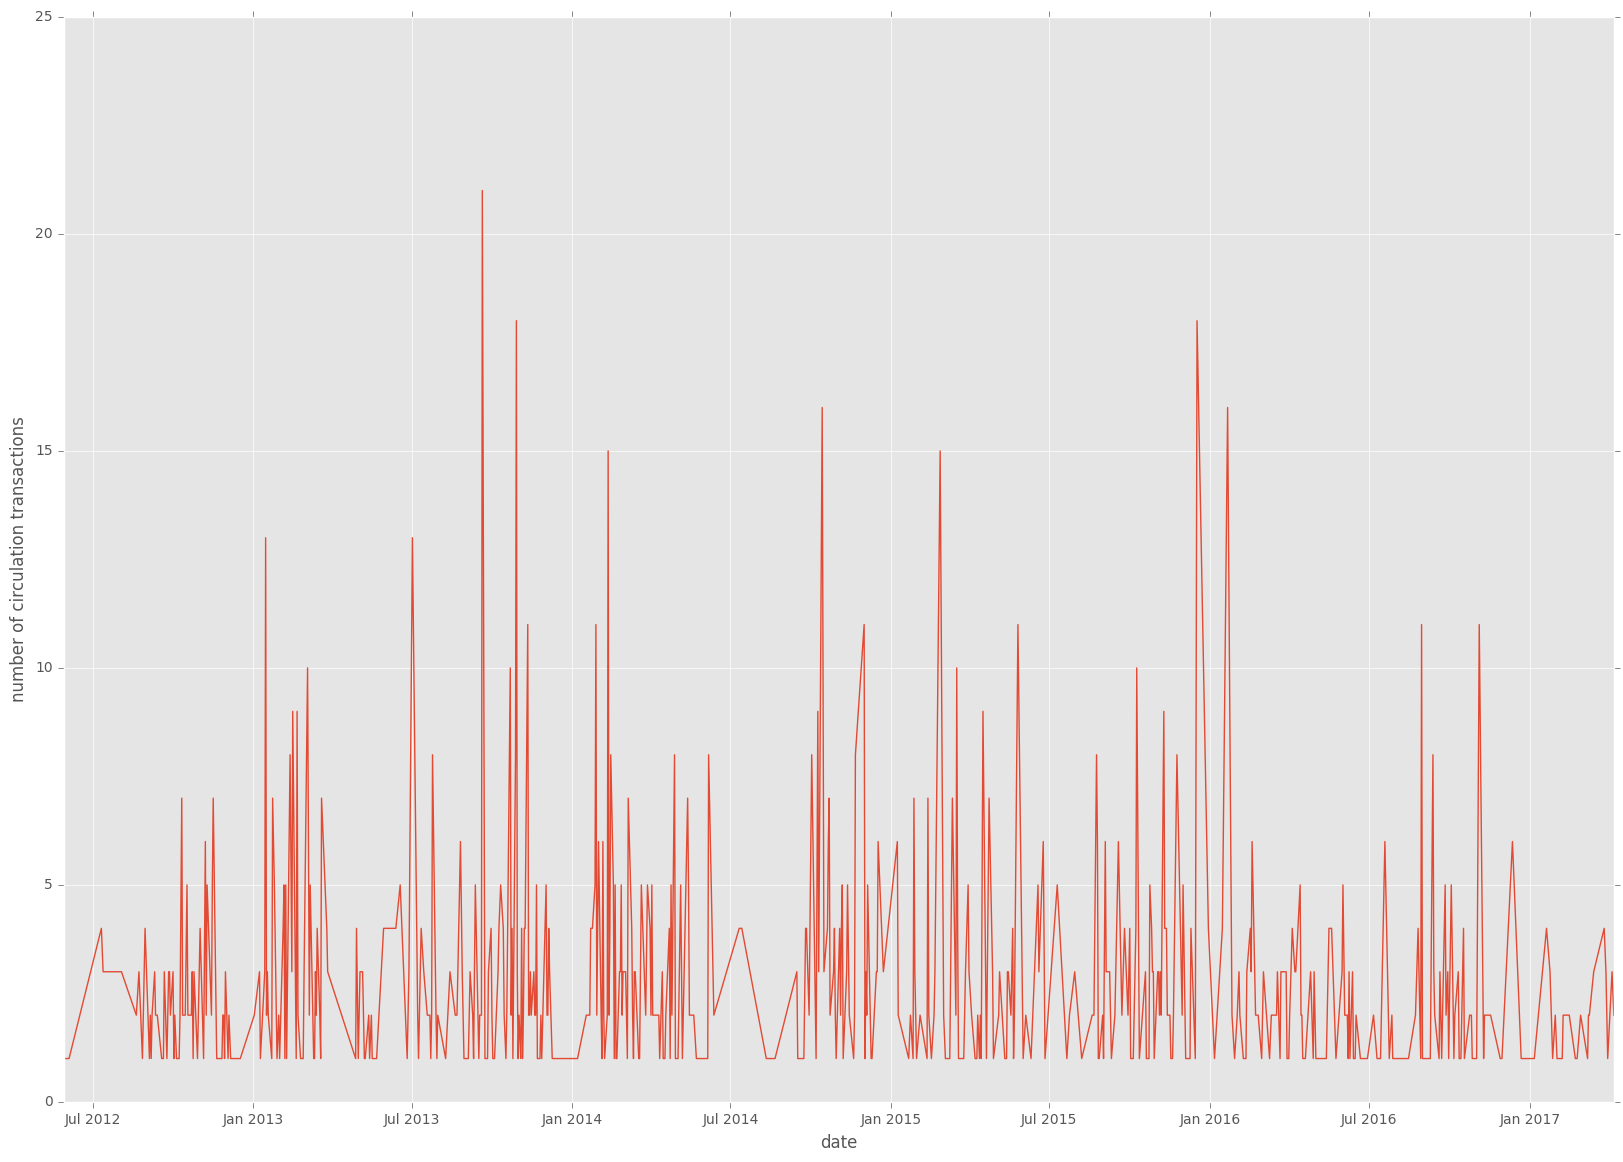

In [6]:
date_list = koha_dataframe['date']

date_counts = defaultdict(int)
for date in date_list:
    date_counts[date] += 1

date_series = pd.Series(date_counts, name= "date_counts")

fig=plt.figure(figsize=(20, 14), dpi= 80)
date_plt = date_series.plot()
date_plt.set(xlabel ='date', ylabel = "number of circulation transactions")

### Transactions Over Time by Year

In [7]:
year_list = koha_dataframe['year']

year_counts = defaultdict(int)
for year in year_list:
    year_counts[year] += 1
    
year_series = pd.Series(year_counts, name= "year_counts")

year_df = year_series.to_frame().rename(columns={'index':'year'})

year_df

,year_counts
2012,142
2013,461
2014,417
2015,382
2016,280
2017,49


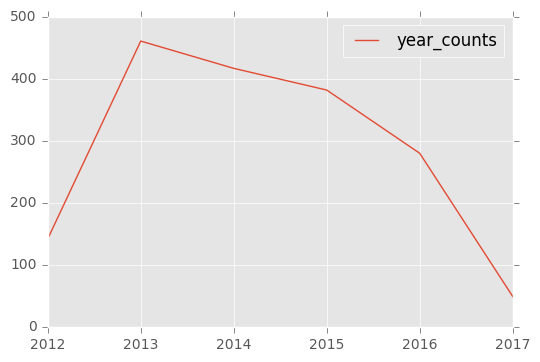

In [8]:
year_plt = year_df.plot()
year_plt.ticklabel_format(useOffset=False)

### Transactions Over Time by Month

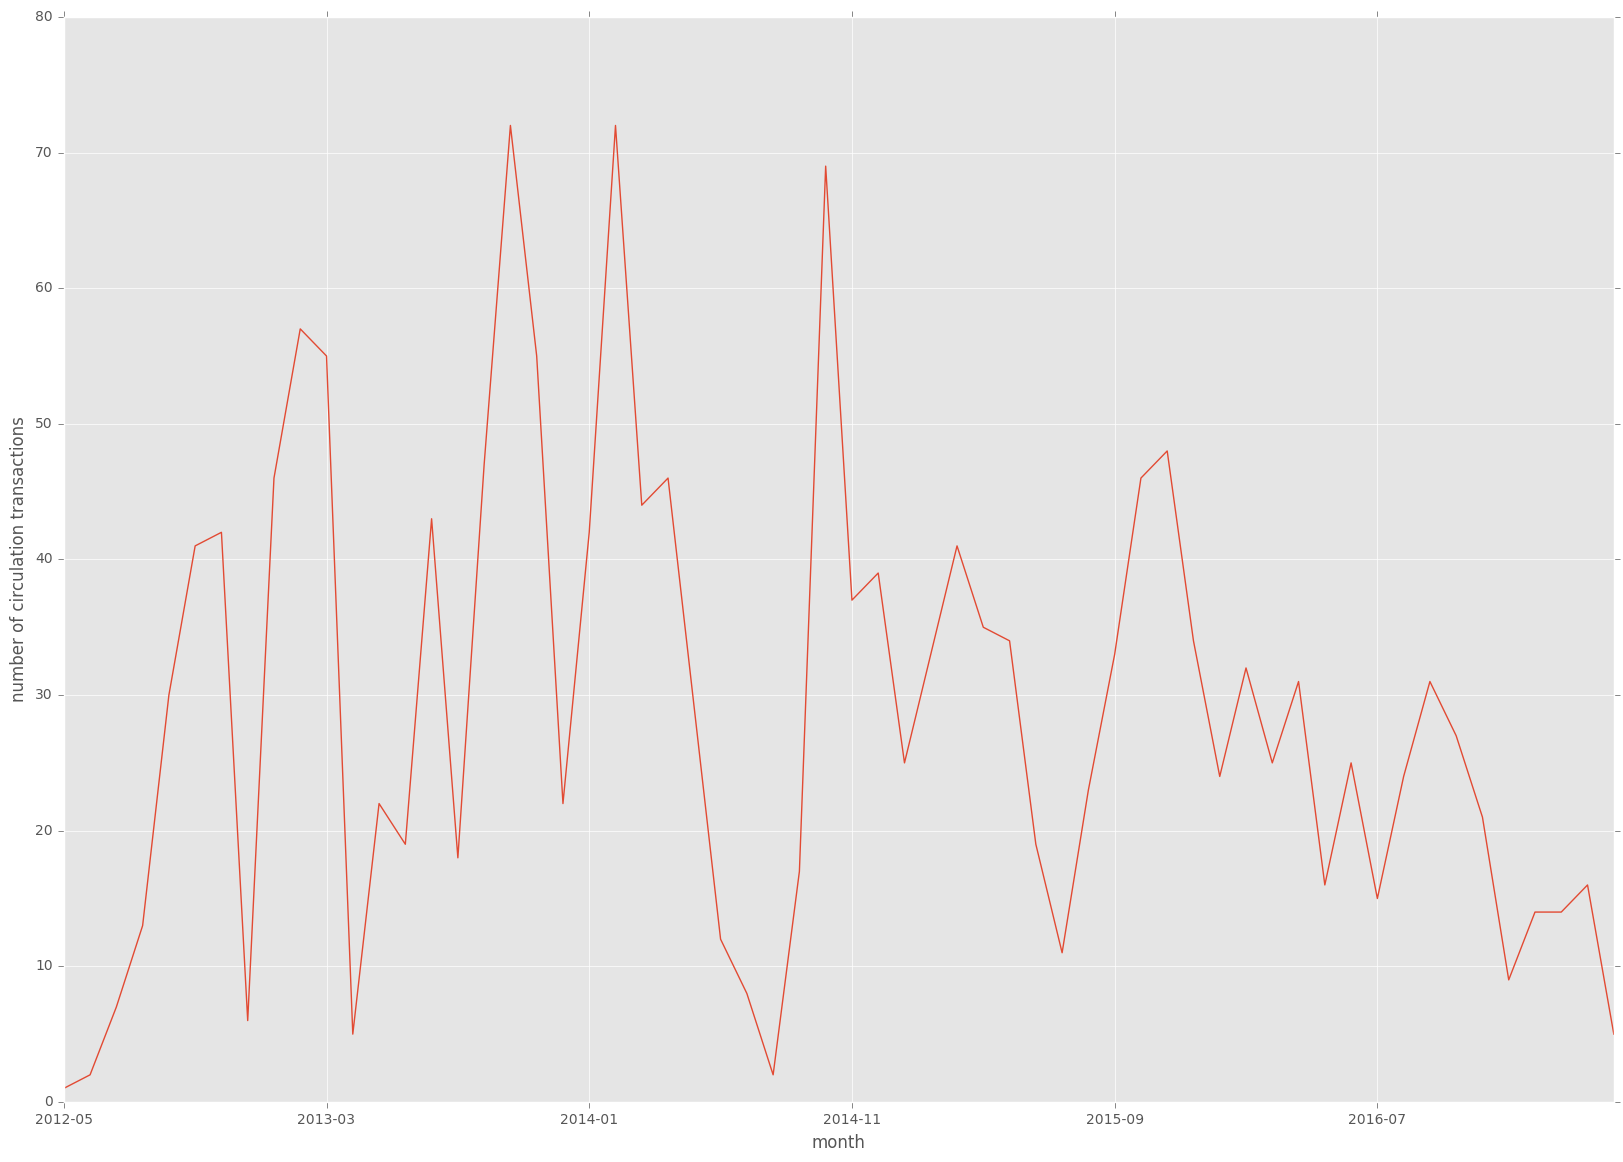

In [9]:
month_year_list = koha_dataframe['month_year']

month_year_counts = defaultdict(int)
for month_year in month_year_list:
    month_year_counts[month_year] += 1

month_year_series = pd.Series(month_year_counts, name= "month_year_counts")

fig=plt.figure(figsize=(20, 14), dpi= 80)
month_year_df_plt=month_year_series.plot()
month_year_df_plt.set(xlabel ='month', ylabel = "number of circulation transactions")

### Volume of Transactions by Month

In [10]:
month_list = koha_dataframe['month']

month_counts = defaultdict(int)
for month in month_list:
    month_counts[month] += 1
    
month_series = pd.Series(month_counts, name= "month_counts")

month_df = month_series.to_frame()

month_df

,month_counts
01,151
02,208
03,181
04,122
05,102
06,77
07,84
08,80
09,158
10,255


Index number corresponds to month (e.g., 01 = January, 02 = February, etc.)

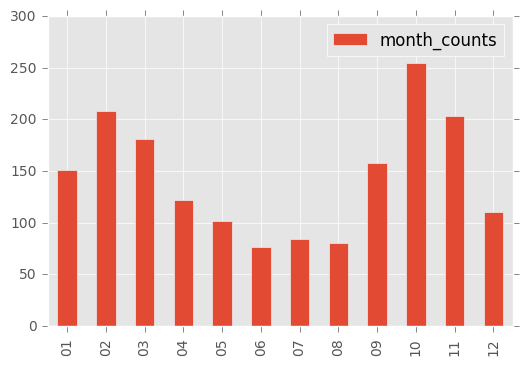

In [11]:
month_df.plot(kind="bar")

## Data Visualization of Subject Popularity

The second part of the final project is trying to understand subject popularity Because this was imported from marcxml, all of the subjects for any given title is housed in one cell, so I will create a new dataframe to store the separated subject terms.

To do that, I first converted the subject column to a list with .tolist().

In [12]:
subject_list = koha_dataframe['subjects'].tolist()

In [13]:
subject_list

['Police Vocational guidance United States. Law enforcement Vocational guidance United States. Criminal justice, Administration of Vocational guidance United States. Police. Law enforcement Vocational guidance. Administration of criminal justice Vocational guidance.',
 'World health Vocational guidance. Vocational guidance. Employment in foreign countries. World Health. Vocational Guidance. Employment. Internationality.',
 'College graduates Employment United States. College majors United States. Employment interviewing United States. Job hunting United States.',
 'Vocational guidance United States Handbooks, manuals, etc. Minorities Vocational guidance Handbooks, manuals, etc. Foreign workers Handbooks, manuals, etc.',
 'Authorship Handbooks, manuals, etc. Freelance journalism Handbooks, manuals, etc.',
 'Authorship Handbooks, manuals, etc. Freelance journalism Handbooks, manuals, etc.',
 'Authorship Handbooks, manuals, etc. Freelance journalism Handbooks, manuals, etc.',
 'Authorship

In [14]:
subject_terms_list=[]

As previously mentioned, because many different subjects are housed as one item in the list, I want to split subjects so that each subject is a list item. I looped through each item and split on the period separator, then joined the strings on a semicolon and appended the result to a new list called subject_terms_list.

In [15]:
for s in subject_list:
    term_string=str(s).split('.')
    ';'.join(term_string)
    subject_terms_list.append(term_string)
    

Since the result of the above was a list of lists, to make it one master list, I created yet another list and then looped through my list of lists and joined lists together.

In [16]:
master_terms_list = []

for s in subject_terms_list:
    master_terms_list += s

print(master_terms_list)

['Police Vocational guidance United States', ' Law enforcement Vocational guidance United States', ' Criminal justice, Administration of Vocational guidance United States', ' Police', ' Law enforcement Vocational guidance', ' Administration of criminal justice Vocational guidance', '', 'World health Vocational guidance', ' Vocational guidance', ' Employment in foreign countries', ' World Health', ' Vocational Guidance', ' Employment', ' Internationality', '', 'College graduates Employment United States', ' College majors United States', ' Employment interviewing United States', ' Job hunting United States', '', 'Vocational guidance United States Handbooks, manuals, etc', ' Minorities Vocational guidance Handbooks, manuals, etc', ' Foreign workers Handbooks, manuals, etc', '', 'Authorship Handbooks, manuals, etc', ' Freelance journalism Handbooks, manuals, etc', '', 'Authorship Handbooks, manuals, etc', ' Freelance journalism Handbooks, manuals, etc', '', 'Authorship Handbooks, manuals,

This master list still has some issues, such as inconsistent cases for the same terms, and also contains empty strings, NaN values, and some strings have whitespaces at the front. This step cleans the data and prepares it for plotting.

In [17]:
final_subject_list = []

for m in master_terms_list:
    if m != 'nan':
        if m != ' nan':
            if m != '':
                if m[0] == ' ':
                    lowercase_word = m.lower()
                    final_subject_list.append(lowercase_word[1:])
                else:
                    lowercase_word = m.lower()
                    final_subject_list.append(lowercase_word)

In [18]:
final_subject_list

['police vocational guidance united states',
 'law enforcement vocational guidance united states',
 'criminal justice, administration of vocational guidance united states',
 'police',
 'law enforcement vocational guidance',
 'administration of criminal justice vocational guidance',
 'world health vocational guidance',
 'vocational guidance',
 'employment in foreign countries',
 'world health',
 'vocational guidance',
 'employment',
 'internationality',
 'college graduates employment united states',
 'college majors united states',
 'employment interviewing united states',
 'job hunting united states',
 'vocational guidance united states handbooks, manuals, etc',
 'minorities vocational guidance handbooks, manuals, etc',
 'foreign workers handbooks, manuals, etc',
 'authorship handbooks, manuals, etc',
 'freelance journalism handbooks, manuals, etc',
 'authorship handbooks, manuals, etc',
 'freelance journalism handbooks, manuals, etc',
 'authorship handbooks, manuals, etc',
 'freelance

I create a dictionary with the subject terms as keys, and the count as the values.

In [19]:
subject_counts = defaultdict(int)
for subject in final_subject_list:
    subject_counts[subject] += 1

In [20]:
subject_df = pd.Series(subject_counts, name="Subject_df")

In [21]:
subject_df.sort_values(ascending=False)

job hunting                                                                           240
vocational guidance                                                                   210
employment interviewing                                                               180
career development                                                                    147
employment interviewing united states                                                 136
success in business                                                                   101
exposition (rhetoric) essay authorship                                                 92
universities and colleges united states graduate work admission                        89
college applications united states                                                     86
business consultants vocational guidance                                               86
consultants vocational guidance                                                        71
job huntin

I then created a new list with just the top 20 subjects and plotted those out.

In [22]:
subject_plot_list = subject_df.sort_values(ascending=False)[:19]

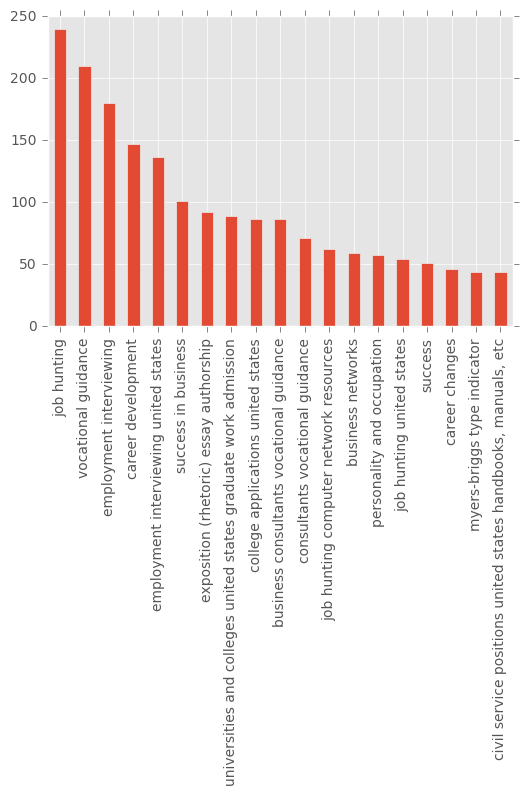

In [23]:
subject_plot_list.plot(kind="bar")

And that's it!